# Mutual information of written English text

Author: J. Lizier, Isabelle De Backer, 2022-; based on the original Matlab tutorials.

The following block aims to import all the relevant libraries to analyse data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Specifics required for the text processing here:
import string
import re

# Preparing your environment

As per `Module_2_notebook.ipynb` etc. we need to use the functions we have defined in our previous work in other notebooks. So gather the new functions you wrote in this module into your `simpleinfotheory.py` script, and make sure it is referencable from here (you may need to change the folder referenced below) before you run the import line in the next cell:

In [2]:
# Option 3: edit simpleinfotheory.py and past your functions into that as you write them
import sys
sys.path.append('../../Module1-IntroToInfoTheory/PythonCode/completed/')
import simpleinfotheory

# 6. (Optional extension) Mutual information between successive letters in written English

In this extension activity, we will continue our analysis of written English extracted from the [Seinfeld](https://en.wikipedia.org/wiki/Seinfeld) scripts as begun in the previous module.

1. Download the scripts from the links on Module 2 on Canvas, load into Python and preprocess as per steps 1-4 of the activity from the previous module, such that we have the characters stored in the numpy array `processedStr`:<br/>
_Note:_ you may need to alter the filename/path to match your own --

In [3]:
filename = './Seinfeld-scripts-textOnly.txt'
with open(filename, 'rt') as f:
    str = f.read()
p = re.compile('[!"#\$%&\'\(\)\*\+\,-\.\/:;<=>\?@\[\]\\\^_`{\|}~0-9]*');
processedStr = p.sub('', str); # Remove punctuation characters and digits
processedStr = ' '.join(processedStr.split('\n')); # Replace newline characters with spaces
processedStr = processedStr.lower(); # Convert all upper case into lower case
processedStr = np.array(list(processedStr)); # Finally convert this into a numpy array so we can work with it
np.unique(processedStr)

array([' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
       'z'], dtype='<U1')

2. How can we now compute the mutual information between one character and the character that comes next in the text? We will need to provide samples of a previous character and the next character to our `simpleinfotheory.mutualinformationempirical()` function.<br/>
   _Hint_: to select all but the last item in a numpy array `x`, you can refer to `x[:-1]`, whilst to select all but the first item in an array `x`, you can refer to `x[1:]`

In [4]:
# Compute the mutual information between successive characters:
simpleinfotheory.mutualinformationempirical(processedStr[:-1],processedStr[1:])[0]

0.7196084319029961

3. Compare the mutual information that you computed above to the average entropy of each character computed as per step 5 of the activity in the previous module. Consider the following:
    1. What proportion of our uncertainty about the next character in the written text is reduced by observing the previous character?
    1. How much code could we save in communicating a character if our coding scheme took the previous character into account?
    1. The mutual information computes a measure of the relationship between the consecutive characters here. You're probably familiar with using correlation to measure a relationship between variables -- could correlation be used here? We will see more about how MI and correlation are related in the coming weeks.
4. Are there relationships between previous characters and later characters beyond those which are consecutive?<br/>
    Can you modify your call to `simpleinfotheory.mutualinformationempirical()` above to compute the mutual information between characters that are not consecutive but separated by a lag of 2 (i.e. with one character in between them)? Is there still a substantial relationship? Is this information solely contained in the earlier character or is it perhaps also included in the immediately previous character?

In [5]:
# Compute the mutual information between characters separated by a lag of two:
simpleinfotheory.mutualinformationempirical(processedStr[:-2],processedStr[2:])[0]

0.3280241319399746

5. Can you see how this relationship changes over longer lags still? Plot the mutual information as a function of lag (up to say 10). At what point would you say there is no longer a relationship? We will discuss statistical approaches to answering that in the coming weeks.

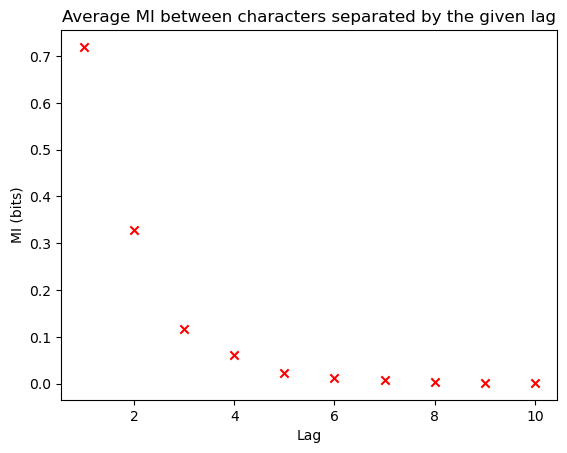

In [6]:
# Compute and plot the MI as a function of lag:
maxLag = 10;

misVsLag = np.zeros(maxLag);

for lag in range(1,maxLag+1): # To go from 1 up to maxLag
    misVsLag[lag-1] = simpleinfotheory.mutualinformationempirical(processedStr[:-lag],processedStr[lag:])[0];

plt.scatter(range(1,maxLag+1), misVsLag, c="red", marker="x");
plt.xlabel('Lag')
plt.ylabel('MI (bits)');
plt.title('Average MI between characters separated by the given lag');

# 7. (Optional extension) Pointwise mutual information between successive letters in written English

_Further challenge_ -- It would be interesting to inspect the **local or pointwise mutual information** between each possible pair of consecutive letters. (See Part 3 of the lecture)

1. To do this, first note how `simpleinfotheory.jointentropyempirical()` returns the set of symbols and their probabilities, as well as the joint entropy value.
2. Now we will alter `simpleinfotheory.mutualinformationempirical()` to similarly retrieve and return all of the relevant probabilities for each consecutive character pair:
    1. Notice how the calls for the joint entropy, $Y$ entropy and $X$ entropy already retrieve these for us.
    2. Then alter the return statement so that all of these relevant values are returned: `return result, xySymbols, xyProbs, xSymbols, xProbs, ySymbols, yProbs` (this is already done in the solution code for `simpleinfotheory.py`).
    3. You will need to restart the kernel to reload the library. You'll also need to update the function calls above, since they're now returning a list. If you append `[0]` to them, such as `simpleinfotheory.mutualinformationempirical(...)[0]`, then this will just pick out the main `result` return variable for the above as desired.
3. Next, call `simpleinfotheory.mutualinformationempirical()` again as per step 2 of the previous exercise for lag 1, but this time storing all of these return values:

In [7]:
# Call the mutual information empirical again, this time storing all of the return values.
result, xySymbols, xyProbs, xSymbols, xProbs, ySymbols, yProbs = simpleinfotheory.mutualinformationempirical(processedStr[:-1],processedStr[1:]);
print(result)

0.7196084319029961


4. Now, we loop over all possible joint symbols and compute the pointwise mutual information -- fill in the line of the code marked with `???` to compute the pointwise MI and then run this code block:

In [8]:
pointwiseMIs = np.zeros((xSymbols.size, ySymbols.size)); # Create array to store the pointwise MI values for each possible character pair
for firstCharIndex in range(xSymbols.size):
    firstChar = xSymbols[firstCharIndex];
    probFirst = xProbs[firstCharIndex];
    for secondCharIndex in range(ySymbols.size):
        secondChar = ySymbols[secondCharIndex];
        probSecond = yProbs[secondCharIndex];
        jointSymbolIndex = np.argwhere((xySymbols[:,0] == firstChar) & (xySymbols[:,1] == secondChar));
        if (jointSymbolIndex.size == 0):
            pointwiseMIs[firstCharIndex, secondCharIndex] = 0; # No occurence, so set to 0
            continue;
        probJoint = xyProbs[jointSymbolIndex];
        # Compute the pointwise MI from probJoint, probFirst and probSecond
        pointwiseMIs[firstCharIndex, secondCharIndex] = np.log2( probJoint / (probFirst * probSecond) );

5. Can you plot these values using `plt.imshow()`? Run the command `plt.colorbar()` to insert a colour bar to show the scale. The plot will have the first letters along the y axis, and second letters along the x axis. You can label these using:

    <code>plt.xlabel('Second letter')
    plt.xticks(ticks=range(0,27), labels=ySymbols.flatten()) # second letters - y - goes on x axis
    plt.ylabel('First letter');
    plt.yticks(ticks=range(0,27), labels=xSymbols.flatten()) # first letters - x - goes on y axis
    cbar = plt.colorbar()
    cbar.set_label('MI (bits)');
    plt.title('MI between successive letters of text');</code>

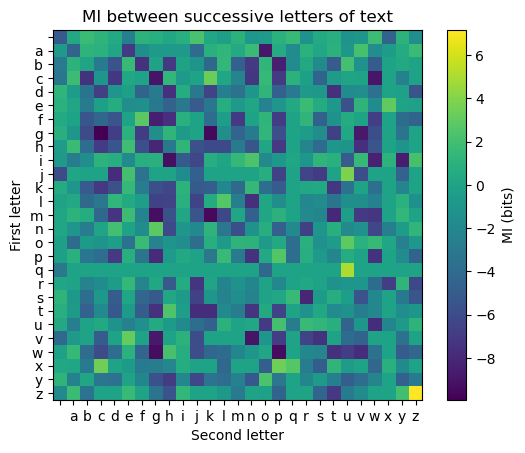

In [9]:
# Make the heatmap plot:
plt.imshow( pointwiseMIs )
# Add the labels pasting in the code from above:
plt.xlabel('Second letter')
plt.xticks(ticks=range(0,27), labels=ySymbols.flatten())
plt.ylabel('First letter');
plt.yticks(ticks=range(0,27), labels=xSymbols.flatten())
cbar = plt.colorbar()
cbar.set_label('MI (bits)');
plt.title('MI between successive letters of text');

6. Examine the values and determine whether you can identify character pairs where the second is highly predictable from the first, and where the first character is misinformative about the second. Can you explain these results?